In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/iris(For PCA Program).csv")
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [6]:
X = data.drop("species",axis=1)

In [7]:
y = data["species"]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [9]:
values , vectors = np.linalg.eig(cov_matrix)

In [10]:
explained=[]
for i in range(len(values)):
  explained.append(values[i]/np.sum(values)*100)

explained

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]

Text(0, 0.5, 'Explained results')

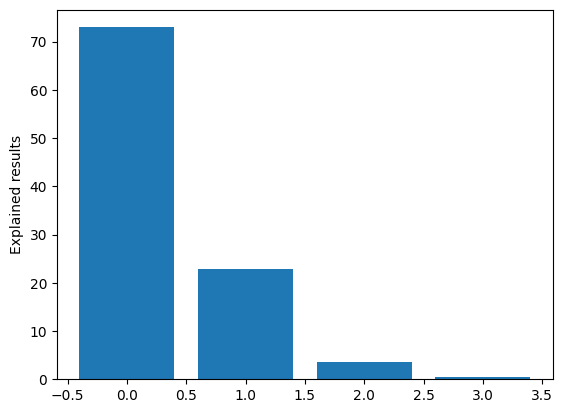

In [11]:
plt.bar(range(4) , explained)
plt.ylabel("Explained results")

In [15]:
projection_1 = X_scaled.dot(vectors.T[0])
projection_2 = X_scaled.dot(vectors.T[1])

In [17]:
res = pd.DataFrame(projection_1,columns=["PC1"])
res["PC2"] = projection_2
res["Y"] = y
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


<Axes: xlabel='PC1', ylabel='PC2'>

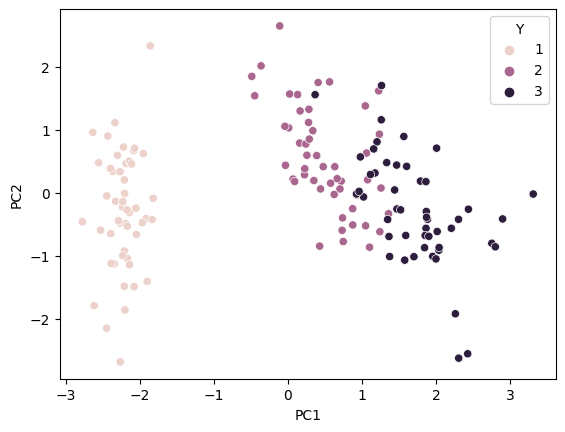

In [18]:
import seaborn as sns
sns.scatterplot(x="PC1",y="PC2",hue="Y",data=res)